# Telco Customer Churn
There are 19 features which could have an influence on the target feature Churn like Gender, Monthly charges and many more..

Our main objective is to reduce the customer turnover using the power of Data Analysis. Finding insights which will help us to better understand the relationship between each feature so we can use those insights to generate more profits!

# Summary
21 features, we will focus on only 19 as ID is not relevant and Churn is our target feature.

7043, In which 11 rows are empty in Total charges column so we will drop these 11 rows because it is a very small number and won't affect our analysis or prediction(if you want). (There are many effective ways to deal with NA values if necessary, In case there are lots of missing value and delete the whole row for just one missing value can reduce our dataset which means information loss, we can use various data imputation techniques to impure relevant values)

# Approch
First, we will transform out dataset in which we can plot, analyze or predict value. Once we transform our dataset we will explore each variable as an independent in response to our target value Churn.

Second, we will find the correlation between all the feature and target value, build a regression model and find the coefficient of each feature. we can also use our regression to predict the future outcome. We will build a decision tree for a better understanding of important feature and plot correlation heat map to understand the relationship between each feature!

# Let's Begin
We will first import all the necessary libraries, our dataset and drop the null values

### Libraries:
Pandas and numpy to help with data manipulation

seaborn, matplotlib to visualization

Sklearn to build a model

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from IPython.display import SVG,display
from graphviz import Source

#importing datafile and converting into pandas dataframe
data = pd.read_csv('C:/Users/mohit/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')


# Data Transform

In [122]:
#replacing 11 null values
data.TotalCharges=data.TotalCharges.replace(' ',np.nan) 
data =data.dropna()

#Replacing No internet service to No because they are the same thing
Replace_no = [ 'TechSupport','StreamingTV', 'OnlineBackup', 'DeviceProtection', 'OnlineSecurity', 'StreamingMovies']
for i in Replace_no : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

#Converting months value to categorical for better understanding of data 
def month_to_year(data) :    
    if data["tenure"] <= 12 :
        return "< 1 year"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "2 year"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "3 year"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "4 year"
    elif data["tenure"] > 48 :
        return "5 Year +"
data["tenure"] = data.apply(lambda data:month_to_year(data) ,axis = 1)

#converting each column into a categorical column
name = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for i in name:
    data[i] = data[i].astype('category')
    

# Data Distribution

We can see that we have uneven data only 26.6% of population as Churn. 

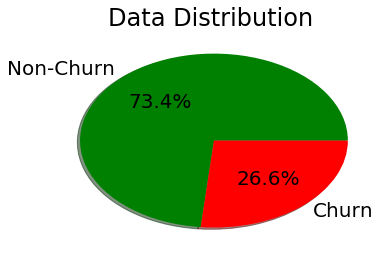

In [123]:
c=data.Churn.value_counts()
plt.pie(c, labels =['Non-Churn', 'Churn'], colors = ['green', 'red'],autopct='%1.1f%%', shadow=True)
plt.title('Data Distribution ')
plt.show()

Split the dataset into 2 sets: Churn and NonChurn for better understanding and help us differentiate the effect of features between these two. 

In [13]:
#split data
Churn = data[data.Churn == 'Yes']
non_Churn = data[data.Churn == 'No']

# Visualization for each feature

Plotting each feature against the target value: Churn or NonChurn and try to find any signification difference

Female    939
Male      930
Name: gender, dtype: int64


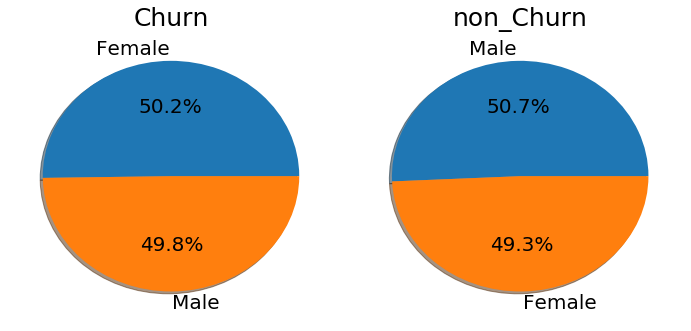

0    1393
1     476
Name: SeniorCitizen, dtype: int64


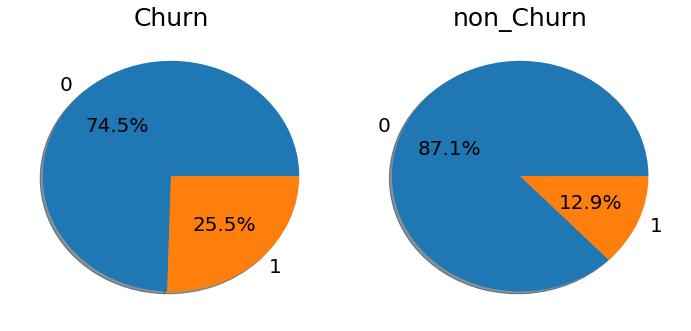

No     1200
Yes     669
Name: Partner, dtype: int64


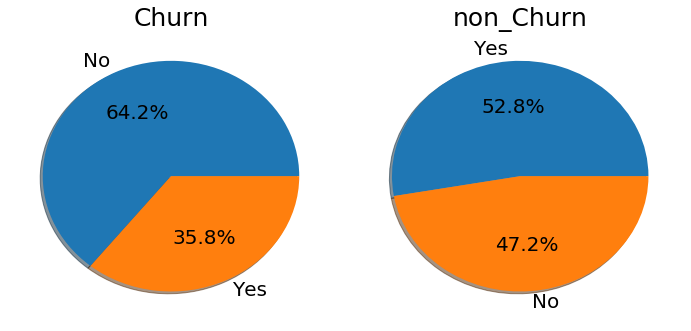

No     1543
Yes     326
Name: Dependents, dtype: int64


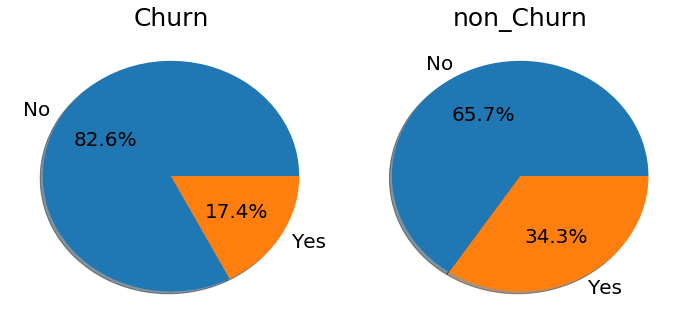

< 1 year    1037
2 year       294
5 Year +     213
3 year       180
4 year       145
Name: tenure, dtype: int64


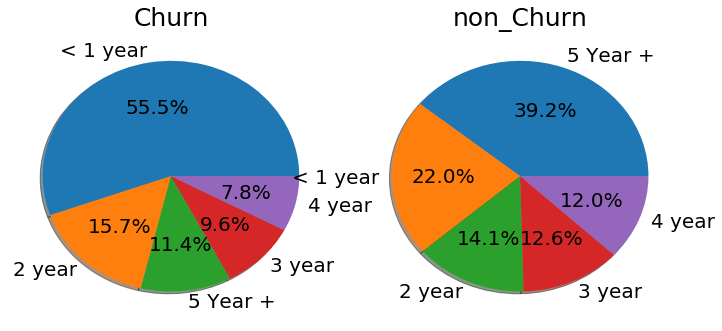

Yes    1699
No      170
Name: PhoneService, dtype: int64


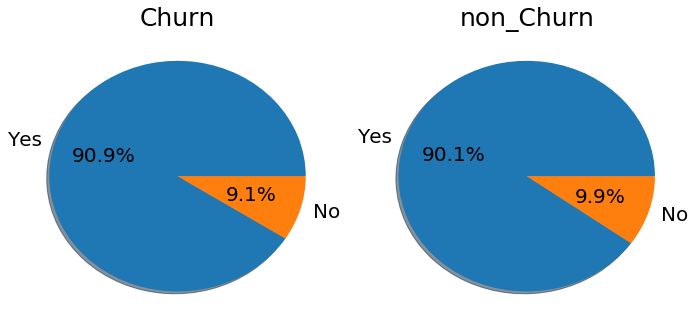

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64


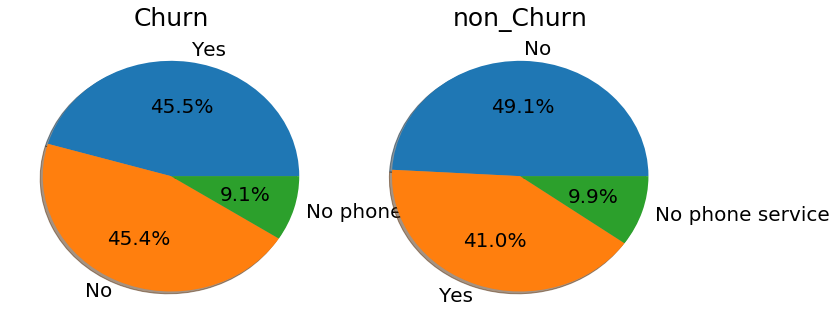

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64


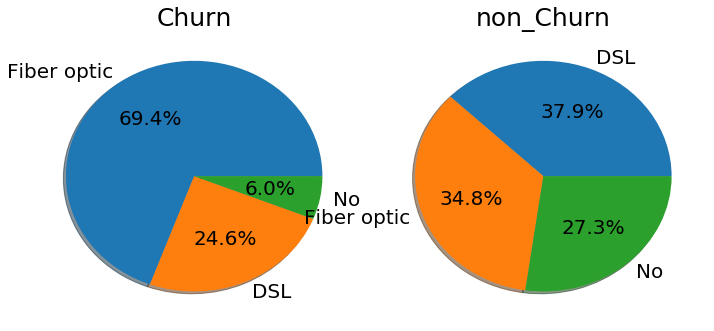

No     1574
Yes     295
Name: OnlineSecurity, dtype: int64


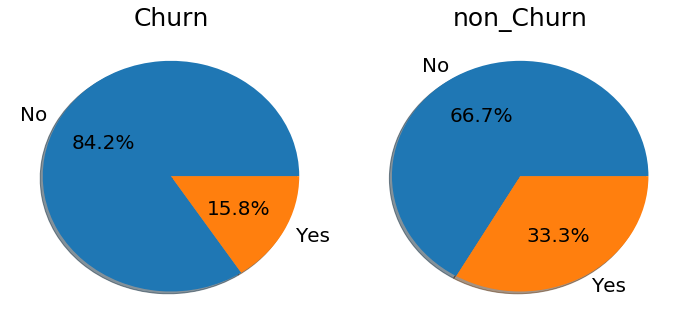

No     1346
Yes     523
Name: OnlineBackup, dtype: int64


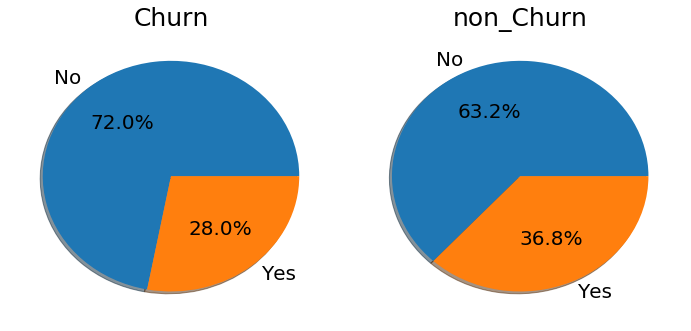

No     1324
Yes     545
Name: DeviceProtection, dtype: int64


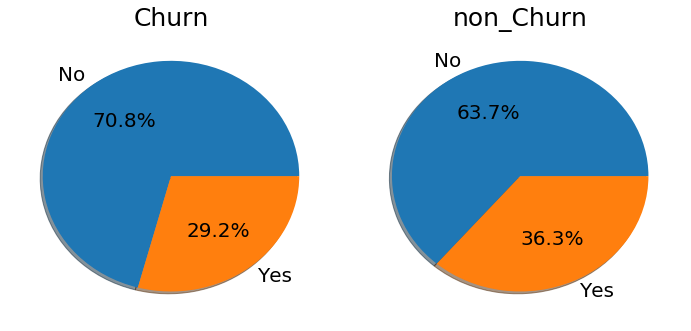

No     1559
Yes     310
Name: TechSupport, dtype: int64


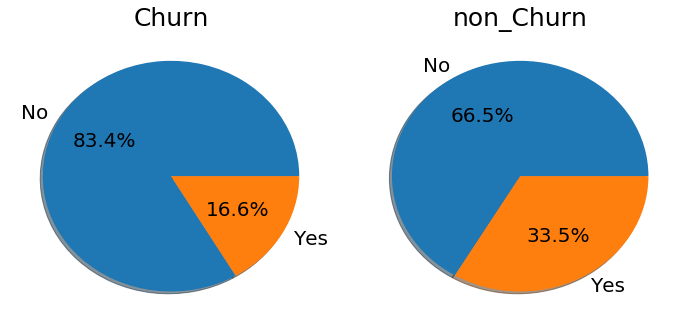

No     1055
Yes     814
Name: StreamingTV, dtype: int64


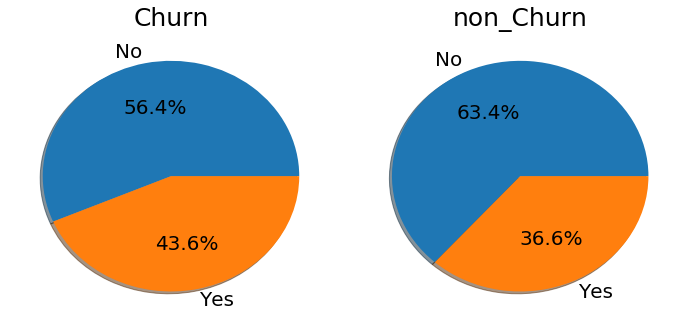

No     1051
Yes     818
Name: StreamingMovies, dtype: int64


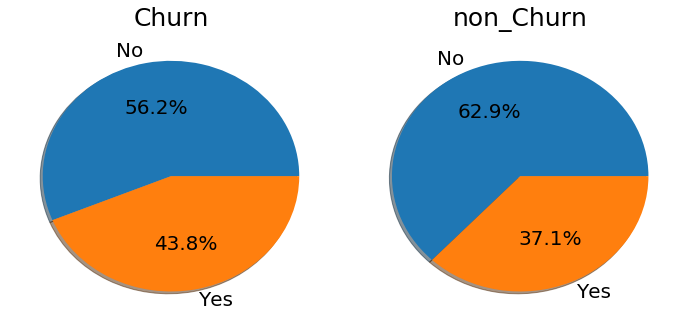

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64


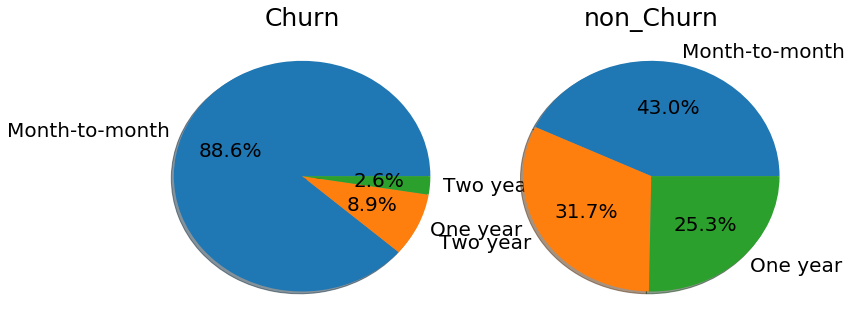

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64


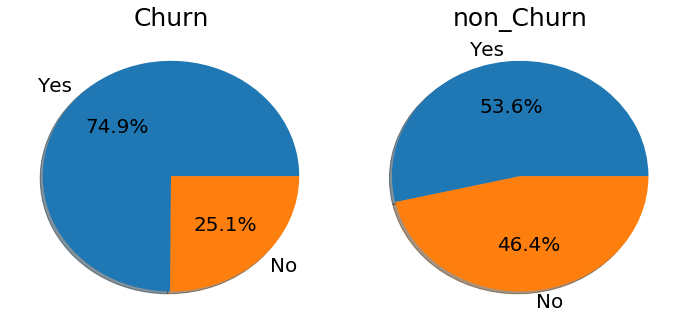

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64


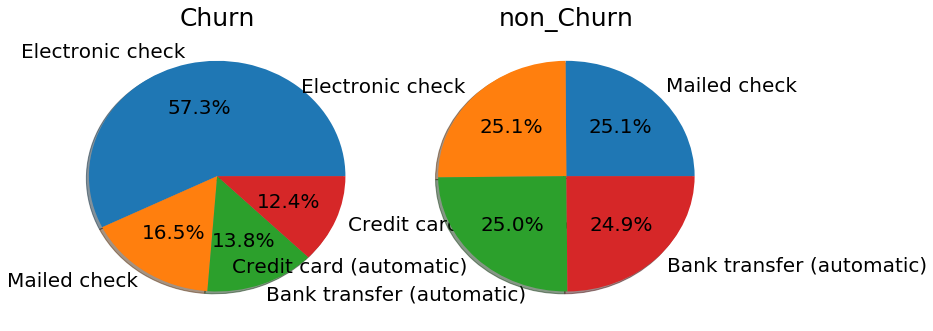

In [124]:
names = list(data)
for i in names[1:-3]:
    
    fig = plt.figure(figsize=(10,5))

    plt.rcParams['font.size'] = 20
    plt.subplot(1, 2, 1)
    c=Churn[i].value_counts()
    print(c)
    plt.pie(c, labels = c.index.tolist(),autopct='%1.1f%%', shadow=True)
    #plt.legend(loc = 'best')
    plt.title('Churn',fontsize=25)

    plt.subplot(1, 2, 2)
    c=non_Churn[i].value_counts()
    plt.pie(c, labels = c.index.tolist(), autopct='%1.1f%%', shadow=True)
    plt.title('non_Churn', fontsize=25)
    
    
    #plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

# Numerical Features

Text(0.5,1,'Monthly Charges ')

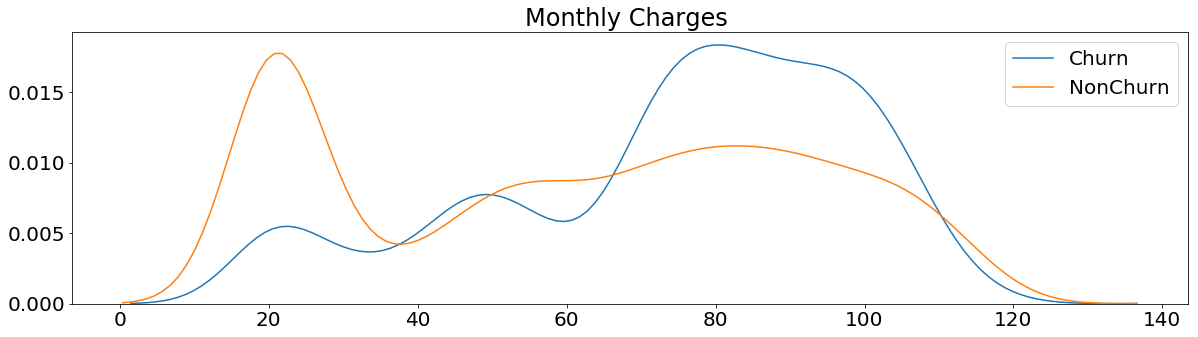

In [142]:
plt.figure(figsize=(20,5))
sns.kdeplot(Churn.MonthlyCharges, label = 'Churn')
sns.kdeplot(non_Churn.MonthlyCharges,label = 'NonChurn')
plt.title('Monthly Charges ')

A clear distribution difference can be observed through the plot that the customer whose monthly charges are between 0 to 50 have the high probability to be NonChurn whereas a customer whose monthly charges are between 50 to 100 have the high probability to be Churn.

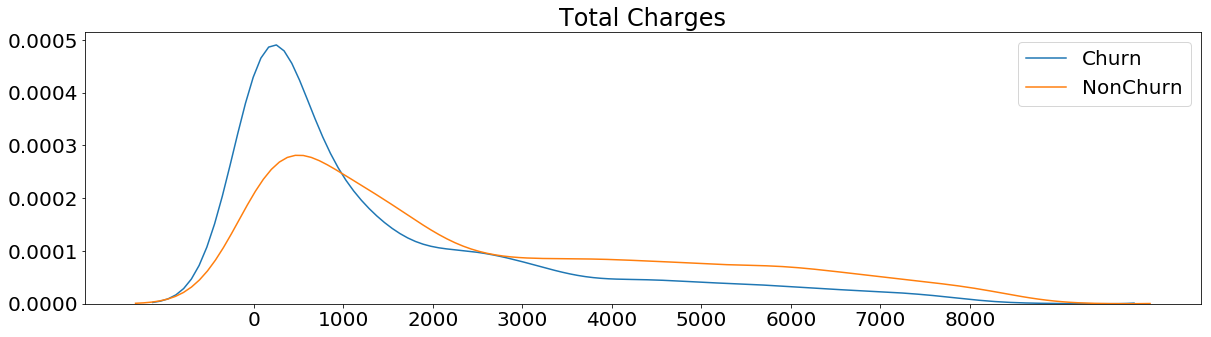

In [141]:

plt.figure(figsize=(20,5))
plt.title('Total Charges')
plt.xticks([0, 1000, 2000, 3000,  4000, 5000, 6000, 7000, 8000])
sns.kdeplot(Churn.TotalCharges, label = 'Churn')
sns.kdeplot(non_Churn.TotalCharges, label = 'NonChurn')

Where as distribution of total charges between Churn and NonChurn do not have significant difference.

# Building Model

In [143]:
#converting values into numerical so can feed to our model.
#There are other ways to do this like dummies which could give us a better model for prediction but 
# here our main focus is 1000 ft view of the data, so it can give us good insights
data['PaymentMethod']  = data['PaymentMethod'].replace({'Bank transfer (automatic)' : 0,'Credit card (automatic)' : 1,
                                                        'Electronic check' :2,
                                                      'Mailed check':3 })
data = data.replace({'Yes':1, 'No': 0})
data = data.replace({'2 year': 2, '3 year': 3, '4 year': 4, '5 Year +':5, '< 1 year':1})
data = data.replace({'Month-to-month':0, 'One year':1, 'Two year':2})
data = data.replace({'DSL':1, 'Fiber optic':2})
data = data.replace({'No phone service':2})
data = data.replace({'Female':0, 'Male':1})

# Bulding a decision tree and display

In [144]:
x=data.iloc[:,1:-1] # independent features
y = data['Churn'] #target Feature
clf = tree.DecisionTreeClassifier(max_depth=4) #creating a decision tree but just keeping depth of 4 for better visualization
clf.fit(x,y)
graph = Source(tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = x.columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )


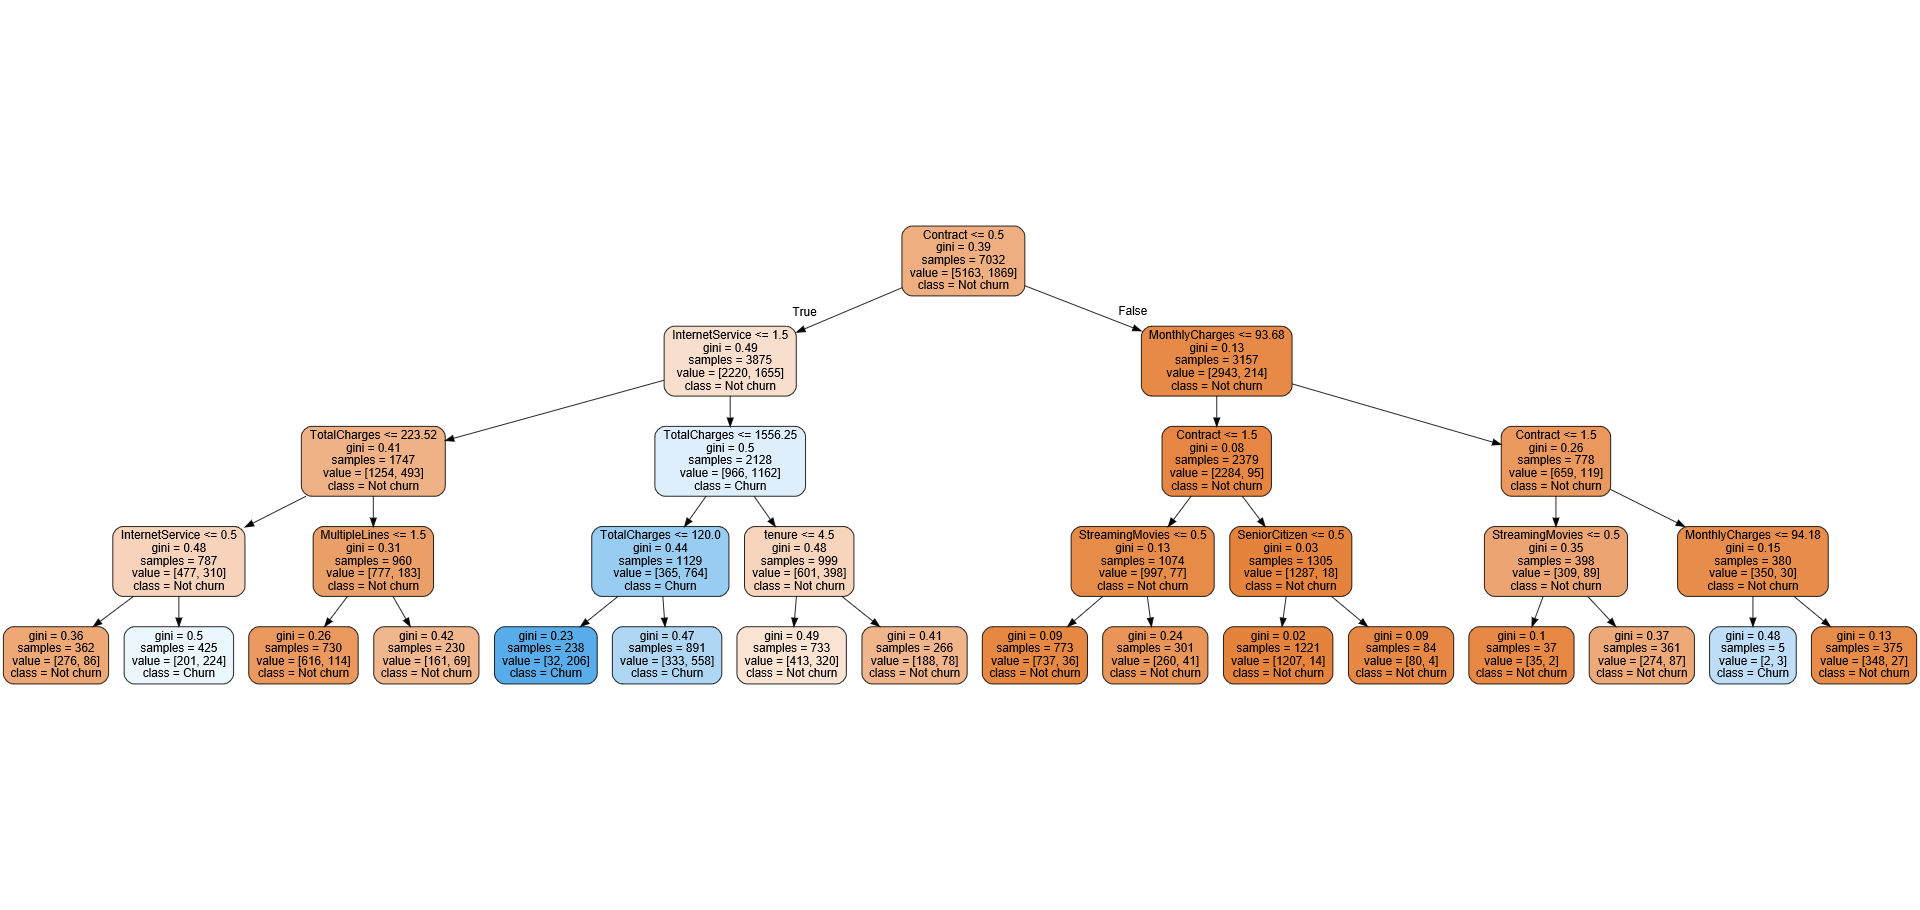

In [151]:
from IPython.display import Image
Image(filename=r'C:\Users\mohit\Desktop\Untitled97.png')

According to our decision tree, the most influencing feature in the data set is the Contract which also justifies that people 
with longer contract tend to be a loyal customer compared to the short term. Our decision tree gives us many insights about
out data and important features.

# Building a Logistic Regression

In [152]:
clf = LogisticRegression()
clf.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
#creating a table of coefficent of regression model which will help us to better understand the feature
clf.coef_.ravel()
temp=pd.DataFrame(clf.coef_.ravel(), list(x))
temp.reset_index(level=0, inplace=True)
temp.columns = ['Feature', 'Coef']
temp=temp.sort_values( 'Coef')
temp

,Feature,Coef
14,Contract,-0.794136
5,PhoneService,-0.661174
8,OnlineSecurity,-0.489967
11,TechSupport,-0.448521
4,tenure,-0.416730
9,OnlineBackup,-0.222583
3,Dependents,-0.183672
10,DeviceProtection,-0.111593
0,gender,-0.050795
2,Partner,-0.040944


Our Regression model also states that the contract has a high negative influence on our target variable Churn

# plotting the negative and positive coefficient 

[Text(0,0,'Contract'),
 Text(0,0,'PhoneService'),
 Text(0,0,'OnlineSecurity'),
 Text(0,0,'TechSupport'),
 Text(0,0,'tenure'),
 Text(0,0,'OnlineBackup'),
 Text(0,0,'Dependents'),
 Text(0,0,'DeviceProtection'),
 Text(0,0,'gender'),
 Text(0,0,'Partner'),
 Text(0,0,'TotalCharges'),
 Text(0,0,'MonthlyCharges'),
 Text(0,0,'PaymentMethod'),
 Text(0,0,'MultipleLines'),
 Text(0,0,'StreamingMovies'),
 Text(0,0,'StreamingTV'),
 Text(0,0,'SeniorCitizen'),
 Text(0,0,'PaperlessBilling'),
 Text(0,0,'InternetService')]

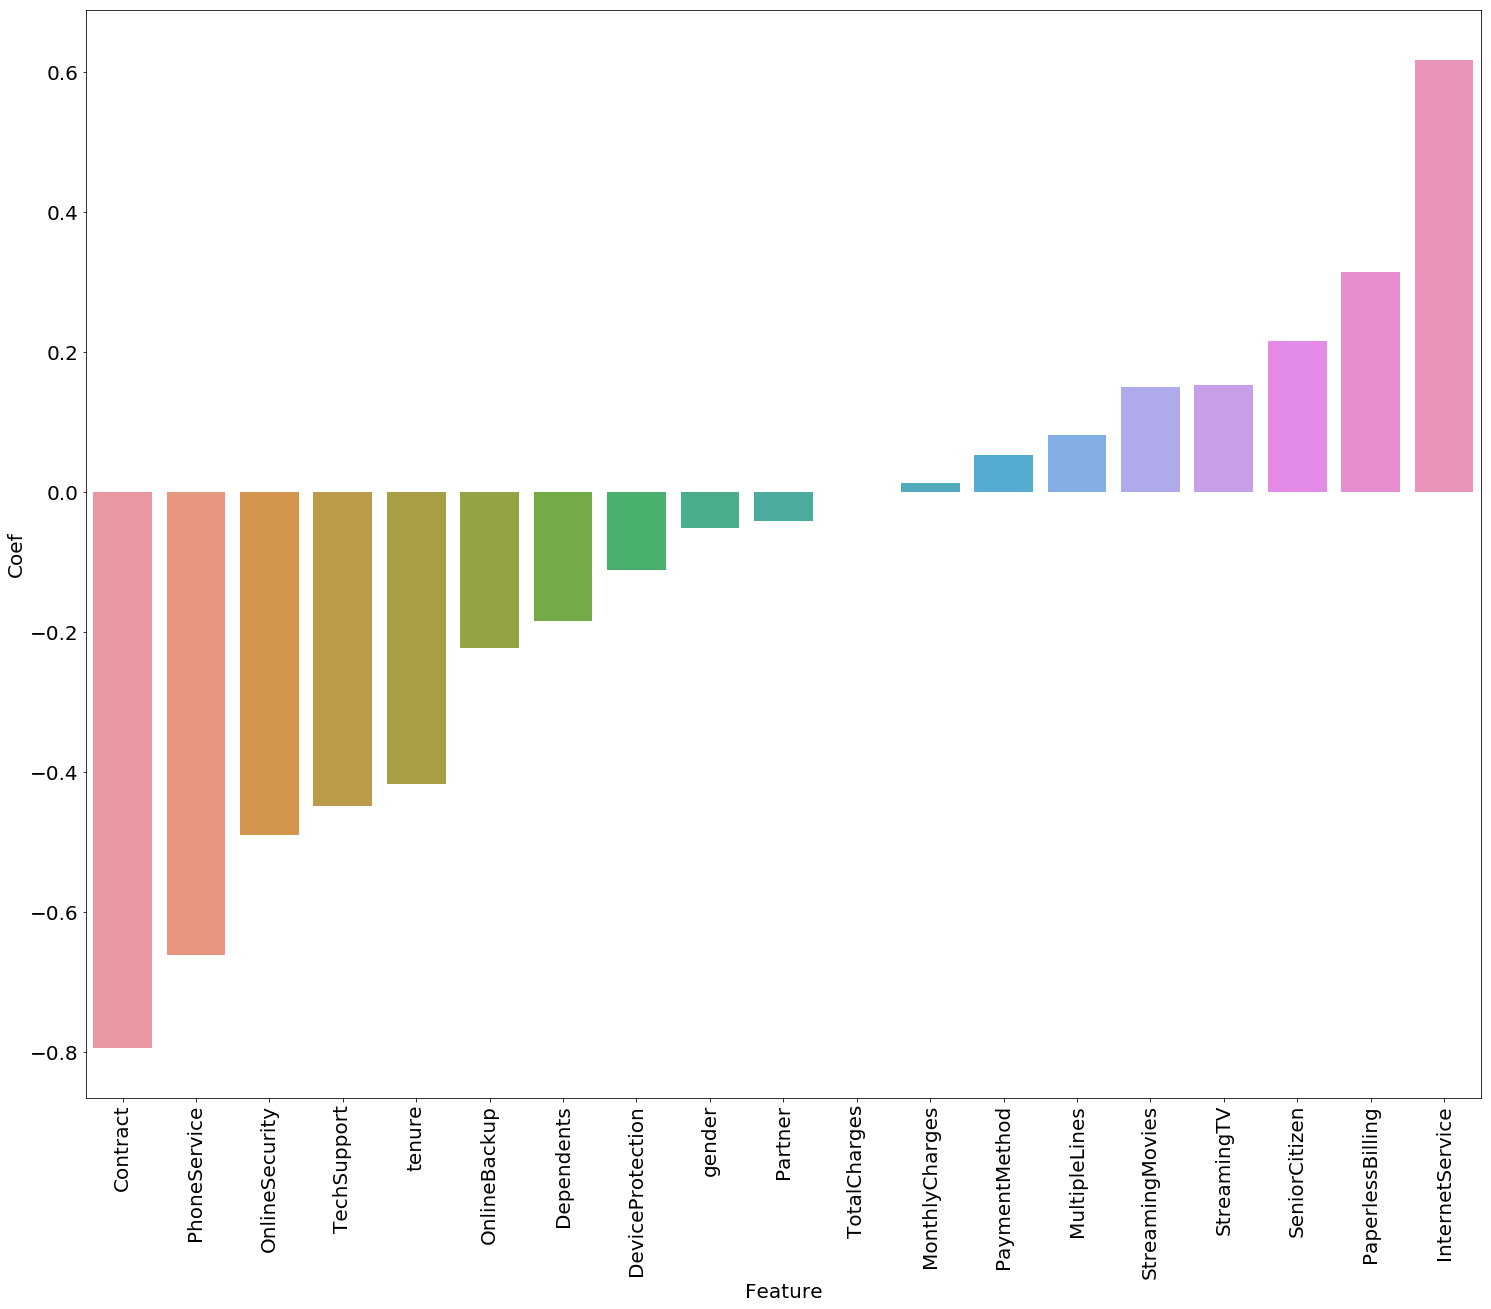

In [157]:
plt.figure(figsize=(25,20))
g=sns.barplot(x = temp.Feature, y = temp.Coef, data = temp)
loc, labels = plt.xticks()
g.set_xticklabels(labels,rotation=90)


# Creating a heat map for the correlation between the variables

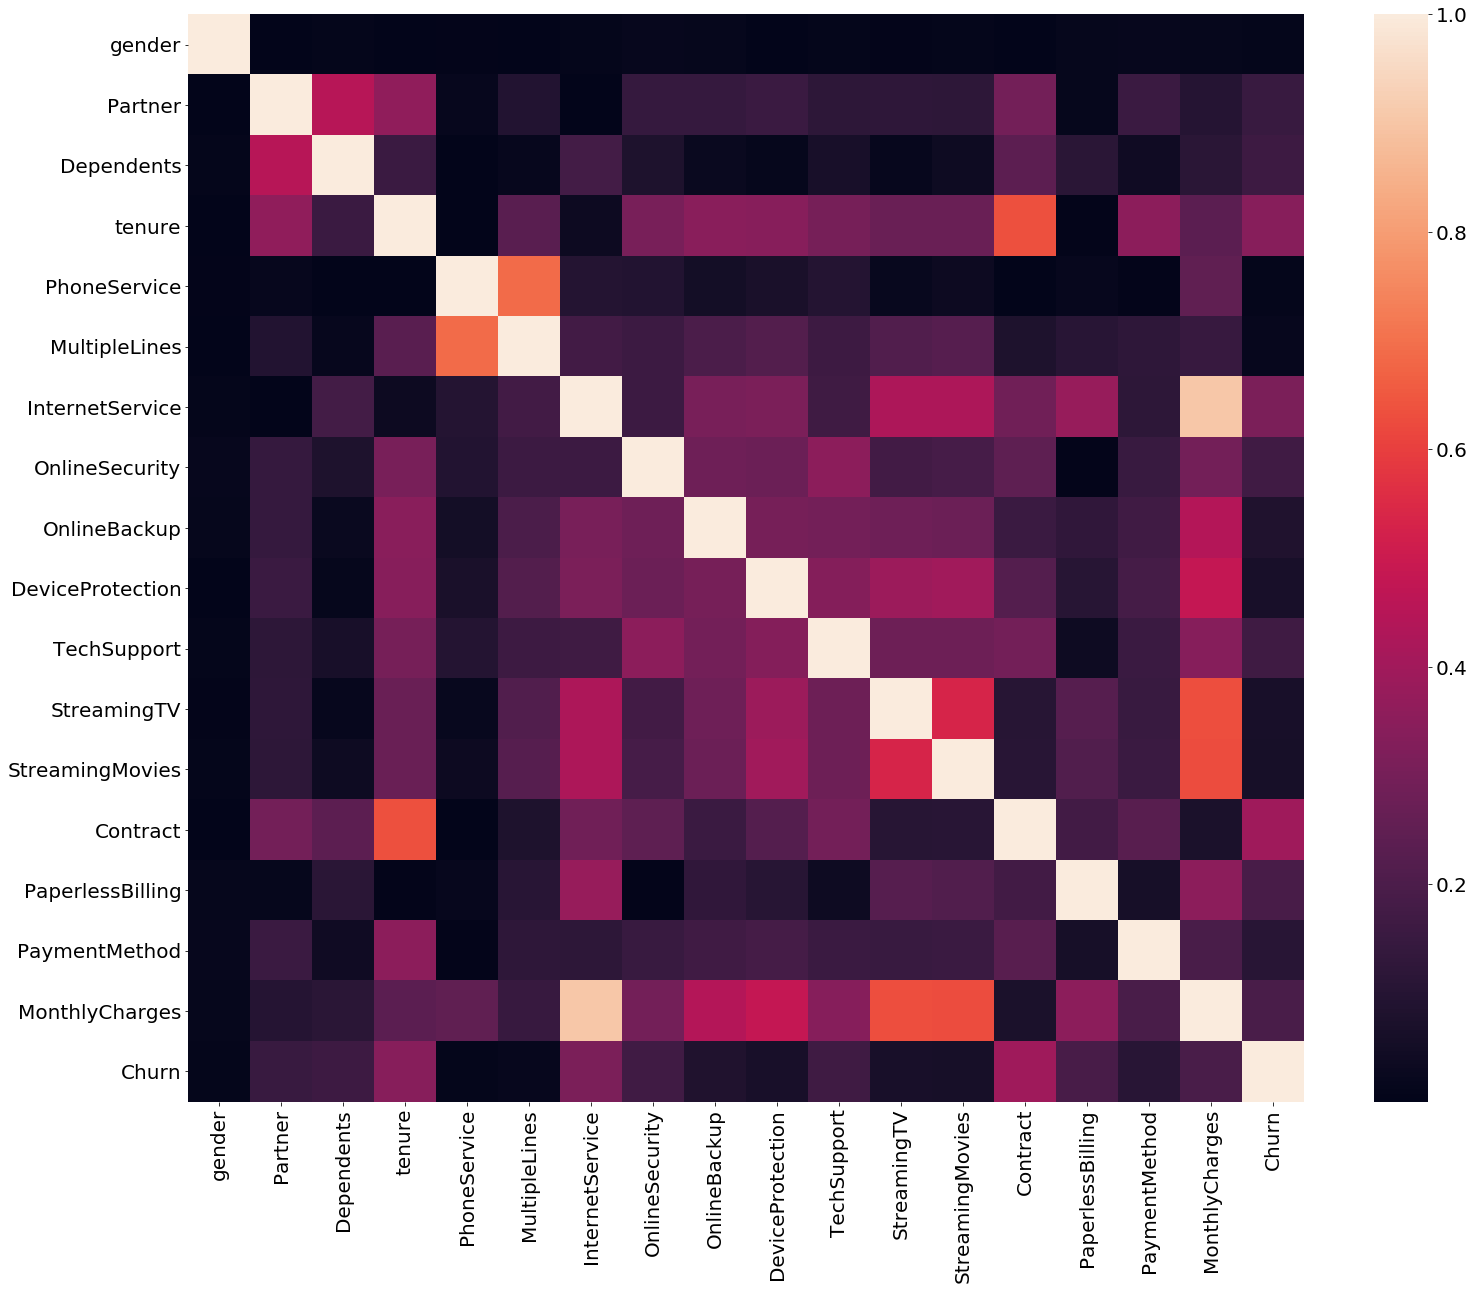

In [159]:
plt.figure(figsize=(25,20))
corr_matrix = data.corr().abs()
sns.heatmap(corr_matrix)